ENTER THE CLASS ID [A1,A2,A3]A1


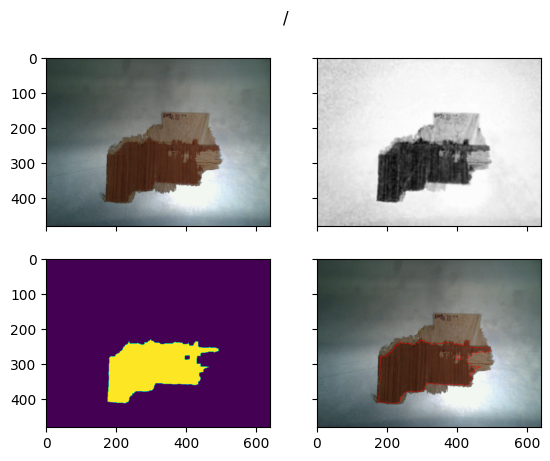

Are you satisfied with the results...[y/n]y


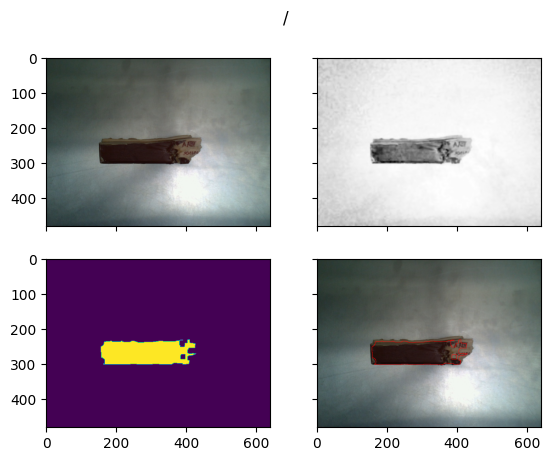

Are you satisfied with the results...[y/n]n
copied F1-s016Box-1-A3.jpg


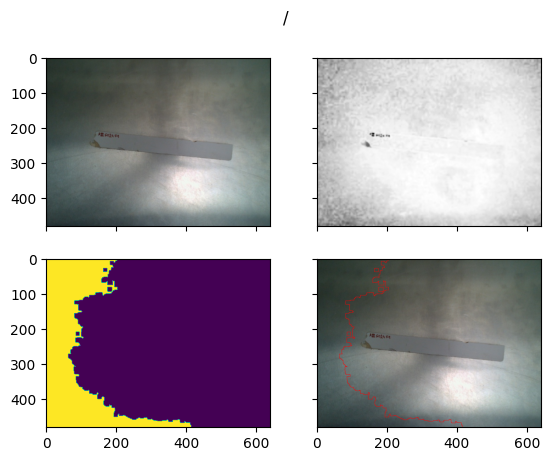

Are you satisfied with the results...[y/n]y


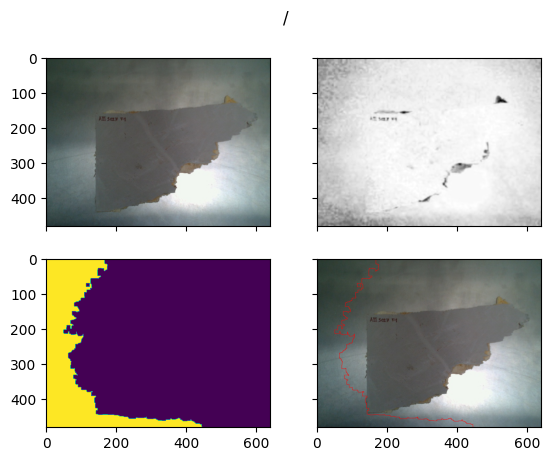

Are you satisfied with the results...[y/n]n
copied F1-s027Box-4-A3.jpg


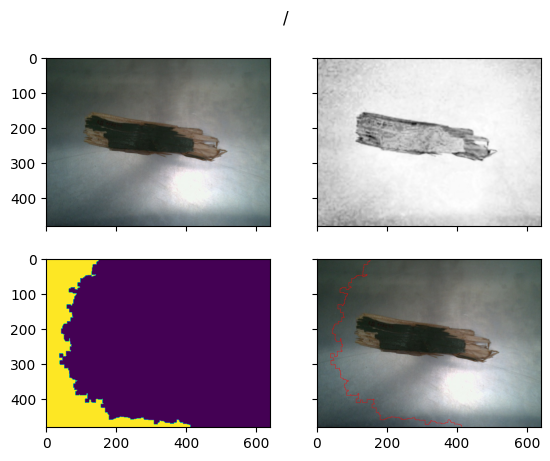

Are you satisfied with the results...[y/n]n
copied F1-s029Box-4-A3.jpg


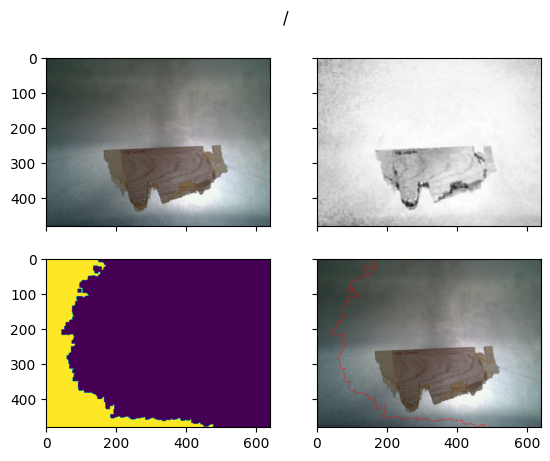

Are you satisfied with the results...[y/n]y


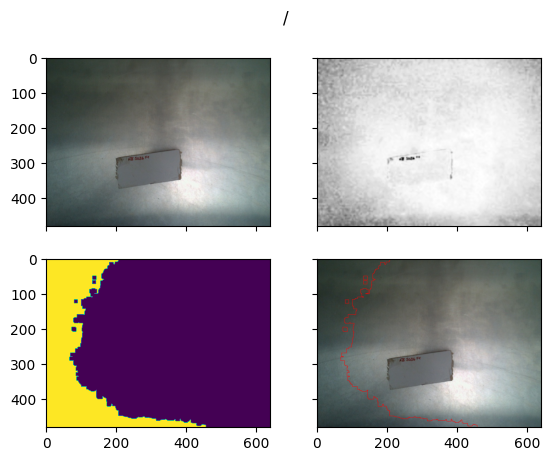

Are you satisfied with the results...[y/n]n
copied F1-s036Box-4-A3.jpg


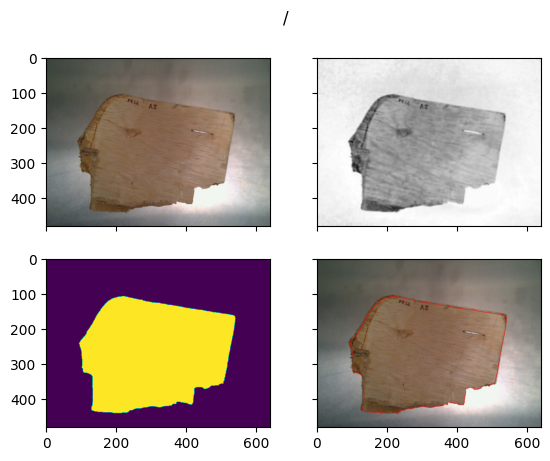

Are you satisfied with the results...[y/n]y
you have 4 files that is auto labelled  :) 
you have 4 files for  manual labelling :( 


In [1]:
# add source_folder,destination_folder,folder_name before running the code

import os
import json
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
source_folder = r"C:\Users\Jerardh Josekutty\Desktop\edge_detection\new\\"
#destination folder for manual labelling
destination_folder =r"C:\Users\Jerardh Josekutty\Desktop\edge_detection\manual_label\\"
class_id=input(str('ENTER THE CLASS ID [A1,A2,A3]'))
folder_name='new'
manual,Auto= ([] for _ in range(2))
def layers(class_id,coordinates, image):
    label= {
                      "version": "5.1.1",
                      "flags": {},
                      "shapes": [
                        {
                          "label": class_id,
                          "points":coordinates,
                           "group_id":'',
                          "shape_type": "polygon",
                          "flags": {}
                        }
                      ],
                      "imagePath": image,
                      "imageHeight":int(image1.shape[0]),
                      "imageWidth": int(image1.shape[1])
                    }
    return label   


for image in os.listdir(folder_name):
        img = cv2.imread(os.path.join(folder_name,image))
        image1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Transform the image to HSV color-space and keep only the value channel
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)

        ch = s
        ch = cv2.GaussianBlur(ch, (7, 7), 0)

        fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, squeeze=True)
        axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[0, 1].imshow(ch, cmap='Greys')

        # Threshold the image with the 95% of the brightest possible pixels
        maxVal = np.max(ch)
        per = 0.4

        # different options
        # _, th = cv2.threshold(s, maxVal * per, 255, cv2.THRESH_BINARY)
        _, th = cv2.threshold(ch, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)  # cv2.THRESH_TRIANGLE, cv2.THRESH_OTSU
        # th = cv2.adaptiveThreshold(ch, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 10)

        fig.suptitle("/")
        # Erode the image and find the connected components
        th = cv2.erode(th, np.ones((6, 6), np.uint8))
        n, conComp, stats, centroids = cv2.connectedComponentsWithStats(th)

        # Obtain the sizes of the connectedComponents skipping the background
        sizes = stats[1:, -1]

        # Obtain the number of the connectedComponent with biggest size
        nComp = np.argmax(sizes) + 1

        # Isolate the connectedComponent and apply closing
        out = np.zeros((img.shape[0], img.shape[1]), np.uint8)
        out[conComp == nComp] = 1
        out = cv2.morphologyEx(out, cv2.MORPH_CLOSE, np.ones((10, 10)))
        axes[1, 0].imshow(out)
        
        # Apply gradient to mask to obtain the border of the ellipse
        out = cv2.morphologyEx(out, cv2.MORPH_GRADIENT, np.ones((2, 2)))
        
        indices = np.where(out != [0])
        coordinates=list(map(list, zip(indices[0], indices[1])))
        
       
        # Extract x and y coordinates of edge points
        c_x, c_y = out.nonzero()
        # Test if all points are ones
        if np.any(np.array([out[c_x[i], c_y[i]] for i in range(0, len(c_x))]) != 1):
            raise ValueError('Problem with extraction of coordinates')

        # Join the border of the ellipse with the image to display it
        img[out == 1] = (0, 0, 255)
       
        
        axes[1, 1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show() 
        
        
#         image2=ch
        
#         (score, diff) = structural_similarity(image1, out, full=True)
#         diff = (diff * 255).astype("uint8")

#         # 6. You can print only the score if you want
#         print("SSIM: {}".format(score))
        
        entry=(input('Are you satisfied with the results...[y/n]')).lower()
        if entry=='y':
        
            #to print the label 
#             label= {
#                       "version": "5.1.1",
#                       "flags": {},
#                       "shapes": [
#                         {
#                           "label": class_id,
#                           "points":coordinates,
#                            "group_id":'',
#                           "shape_type": "polygon",
#                           "flags": {}
#                         }
#                       ],
#                       "imagePath": image,
#                       "imageHeight":int(image1.shape[0]),
#                       "imageWidth": int(image1.shape[1])
#                     }

            with open(os.path.join( 'labels', f'{image.split(".")[0]}.json'), 'w') as f:
                                json.dump(layers(class_id,coordinates, image), f,default=str,indent=1)
            Auto.append(image)
        elif entry=='n':
            source = source_folder + image
            destination = destination_folder + image
            # copy the un labeled files to manual_label folder
           
            if os.path.isfile(source):
                shutil.copy(source, destination)
                print('copied',image)
                manual.append(image)
        else:
            print('invalid input')
print(f'you have {len(Auto)} files that is auto labelled  :) ')                
print(f'you have {len(manual)} files for  manual labelling :( ')
                